In [12]:
from rdkit import Chem
from rdkit.Chem import Draw, MolToSmiles

In [15]:
supplier = Chem.SDMolSupplier('literature_compilation.sdf')

In [24]:
files = ['combined_training_datasets_unique.sdf']

In [31]:
smiles = []
pka = []
ref = []
for file in files:
    supplier = Chem.SDMolSupplier(file)
    for mol in supplier:
        smiles.append(MolToSmiles(mol))
        pka.append(mol.GetProp('pKa'))
        ref.append(mol.GetProp('original_dataset'))

In [26]:
len(smiles)

5994

In [32]:
empty = [0] * len(smiles)
data = {'Solute SMILES': smiles,
        'Solvent SMILES': ['O']*len(smiles),
        'Solute CAS': empty,
        'Solute IUPAC': empty,
        'pKa (avg)': pka,
        'pKa (all)': [[x] for x in pka],
        'Source': ref}

In [28]:
import pandas as pd

In [33]:
aqueous_df = pd.DataFrame(data)
aqueous_df.to_csv('water_data.csv')

In [34]:
smiles[0]

'Brc1c(NC2CC2)nc(C2CC2)nc1N1CCCCCC1'

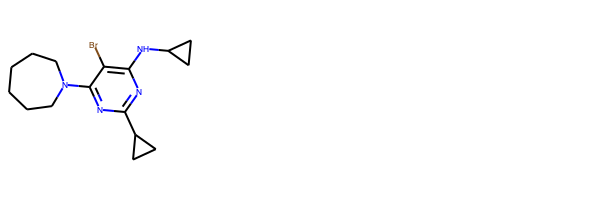

In [37]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smiles[0])])

In [ ]:
#confusion - some of these pka values might actually be pkah? 
#the original paper (machine learning meets pka) doesnt seem to care